## Part 0. Load Data and Inspect

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
orders = pd.read_csv('data/Orders.csv')

In [3]:
returns = pd.read_csv('data/Returns.csv')

In [4]:
orders.shape

(51290, 24)

In [5]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [6]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [57]:
orders.isnull().sum()

#there aren't a lot of missing data, only in postal code

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
dtype: int64

In [7]:
returns.shape

(1079, 3)

In [8]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [9]:
returns.columns

Index(['Returned', 'Order ID', 'Region'], dtype='object')

In [58]:
returns.isnull().sum()

Returned    0
Order ID    0
Region      0
dtype: int64

## Part 1. Preprocessing and EDA

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [28]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row.ID          51290 non-null  int64  
 1   Order.ID        51290 non-null  object 
 2   Order.Date      51290 non-null  object 
 3   Ship.Date       51290 non-null  object 
 4   Ship.Mode       51290 non-null  object 
 5   Customer.ID     51290 non-null  object 
 6   Customer.Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal.Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product.ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub.Category    51290 non-null  object 
 17  Product.Name    51290 non-null 

In [29]:
orders.Profit

0          $62.15
1        -$288.77
2         $919.97
3         -$96.54
4         $311.52
           ...   
51285       $4.50
51286       $3.34
51287       $2.48
51288       $2.40
51289       $1.80
Name: Profit, Length: 51290, dtype: object

In [30]:
orders.Sales

0          $221.98
1        $3,709.40
2        $5,175.17
3        $2,892.51
4        $2,832.96
           ...    
51285       $65.10
51286       $16.72
51287        $8.56
51288       $13.44
51289       $61.38
Name: Sales, Length: 51290, dtype: object

In [34]:
orders['Profit'] = orders['Profit'].str.replace('$', '')
orders['Profit'] = orders['Profit'].str.replace(',', '')

/var/folders/ph/5s8lb5y90zq6_3_rmws41nw00000gn/T/ipykernel_80327/2164090479.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['Profit'] = orders['Profit'].str.replace('$', '')


In [35]:
orders['Profit']

0          62.15
1        -288.77
2         919.97
3         -96.54
4         311.52
          ...   
51285       4.50
51286       3.34
51287       2.48
51288       2.40
51289       1.80
Name: Profit, Length: 51290, dtype: object

In [53]:
orders['Profit'] = pd.to_numeric(orders['Profit'], errors='coerce')

In [37]:
orders['Sales'] = orders['Sales'].str.replace('$', '')
orders['Sales'] = orders['Sales'].str.replace(',', '')

/var/folders/ph/5s8lb5y90zq6_3_rmws41nw00000gn/T/ipykernel_80327/984537385.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['Sales'] = orders['Sales'].str.replace('$', '')


In [38]:
orders['Sales']

0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
          ...   
51285      65.10
51286      16.72
51287       8.56
51288      13.44
51289      61.38
Name: Sales, Length: 51290, dtype: object

In [54]:
orders['Sales'] = pd.to_numeric(orders['Sales'], errors='coerce')

In [55]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row.ID          51290 non-null  int64  
 1   Order.ID        51290 non-null  object 
 2   Order.Date      51290 non-null  object 
 3   Ship.Date       51290 non-null  object 
 4   Ship.Mode       51290 non-null  object 
 5   Customer.ID     51290 non-null  object 
 6   Customer.Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal.Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product.ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub.Category    51290 non-null  object 
 17  Product.Name    51290 non-null 

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.


In [62]:
orders['Order.Date'].describe()

/var/folders/ph/5s8lb5y90zq6_3_rmws41nw00000gn/T/ipykernel_80327/2074181859.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['Order.Date'].describe()


count                   51290
unique                   1430
top       2015-06-18 00:00:00
freq                      135
first     2012-01-01 00:00:00
last      2015-12-31 00:00:00
Name: Order.Date, dtype: object

In [59]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [61]:
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month
orders['Year'] = pd.DatetimeIndex(orders['Order.Date']).year

In [67]:
orders['Month'].unique()

array([11,  2, 10,  1,  6,  4,  3, 12,  7,  9,  8,  5])

In [68]:
orders['Year'].unique()

array([2014, 2012, 2013, 2015])

In [71]:
season_quant = orders.groupby(['Year', 'Month'])['Quantity'].sum().unstack('Year')

In [76]:
season_quant

Year,2012,2013,2014,2015
Month,,,,
1,1463,1874,2413,3122
2,1401,1444,2102,2482
3,1745,2237,2686,3722
4,1934,2250,2688,3594
5,2167,2921,3808,4300
6,3002,3671,5327,6009
7,1836,2321,3252,3637
8,3020,3818,4934,5824
9,3644,4205,5793,6837


In [82]:
season_sales = orders.groupby(['Year', 'Month'])['Sales'].sum().unstack('Year')

In [83]:
season_sales

Year,2012,2013,2014,2015
Month,,,,
1,98898.53,137436.03,199186.09,241268.65
2,103718.01,98854.97,167239.77,184837.46
3,135746.52,163076.85,198594.14,263100.83
4,114332.99,161052.42,177821.44,242772.01
5,158228.35,208365.13,260498.63,288401.13
6,207571.58,256175.76,396519.76,401814.19
7,118434.88,145236.86,229928.92,258705.80
8,208063.31,303143.12,326488.94,456620.18
9,284587.84,289389.25,376619.51,481157.41


In [84]:
season_profit = orders.groupby(['Year', 'Month'])['Profit'].sum().unstack('Year')

In [85]:
season_profit

Year,2012,2013,2014,2015
Month,,,,
1,8321.76,10306.73,26810.58,28001.38
2,14323.02,15095.00,23762.45,19751.71
3,13089.59,17992.87,23433.83,37357.16
4,13211.11,17367.01,19462.13,23782.32
5,14644.10,29876.75,28495.59,33953.63
6,20940.49,34407.02,45478.29,43778.55
7,4040.56,15585.43,28863.70,28035.81
8,26452.97,43573.92,31023.60,53542.99
9,35044.54,27776.24,38905.62,67979.54


<AxesSubplot:title={'center':'Quantity of Items Sold by Month and Year'}, xlabel='Month'>

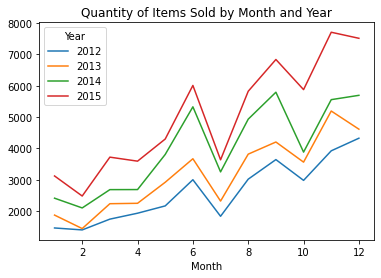

In [88]:
season_quant.plot(
    y=season_quant.columns,
    title='Quantity of Items Sold by Month and Year'
)

#overall increases throughout the year, with highs in June and end of the year
#also increased each year, with 2012 the least and 2015 the most quantity

<AxesSubplot:title={'center':'Sales by Month and Year'}, xlabel='Month'>

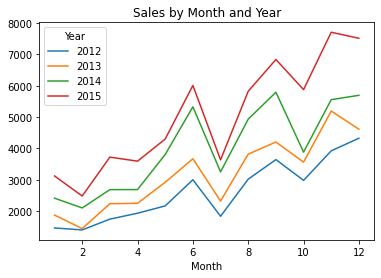

In [89]:
season_quant.plot(
    y=season_sales.columns,
    title='Sales by Month and Year'
)

#similar to quantity

<AxesSubplot:title={'center':'Profit by Month and Year'}, xlabel='Month'>

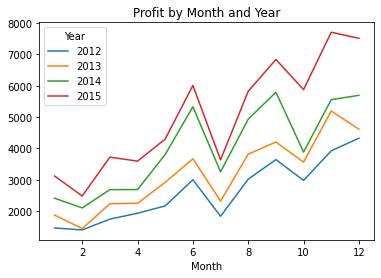

In [91]:
season_quant.plot(
    y=season_profit.columns,
    title='Profit by Month and Year'
)

#similar to quantity and sales

In [ ]:
Order.groupby(['Order.Month','Category'])['Quantity'].sum().unstack('Category')

In [ ]:
season_quant = orders.groupby(['Year', 'Month'])['Quantity'].sum().unstack('Year')

In [94]:
seacat_quant = orders.groupby(['Year', 'Month', 'Category'])['Quantity'].sum().unstack('Category')

In [95]:
seacat_quant

Category    Furniture  Office Supplies  Technology
Year Month                                        
2012 1            246              997         220
     2            278              800         323
     3            319             1093         333
     4            326             1233         375
     5            409             1268         490
     6            680             1746         576
     7            313             1142         381
     8            569             1822         629
     9            757             2327         560
     10           637             1773         571
     11           799             2341         784
     12           963             2447         916
2013 1            400             1108         366
     2            286              839         319
     3            457             1316         464
     4            422             1298         530
     5            481             1872         568
     6            718             2236         717
     7            466             1402         453
     8            647             2370         801
     9            803             2519         883
     10           657             2114         792
     11          1135             3190         868
     12           794             2884         936
2014 1            544             1452         417
     2            453             1279         370
     3            582             1576         528
     4            529             1652         507
     5            737             2359         712
     6            960             3262        1105
     7            654             1929         669
     8            883             3148         903
     9           1169             3590        1034
     10           866             2214         803
     11          1084             3342        1130
     12          1222             3361        1111
2015 1            560             1923         639
     2            477             1422         583
     3            740             2298         684
     4            728             2208         658
     5            857             2671         772
     6           1076             3768        1165
     7            724             2145         768
     8            960             3679        1185
     9           1382             4136        1319
     10          1163             3484        1229
     11          1453             4656        1597
     12          1527             4553        1433

In [98]:
seacat_sales = orders.groupby(['Year', 'Month', 'Category'])['Sales'].sum().unstack('Category')

In [99]:
seacat_sales

Category    Furniture  Office Supplies  Technology
Year Month                                        
2012 1       34463.74         33526.78    30908.01
     2       35799.40         26135.09    41783.52
     3       40277.32         31578.62    63890.58
     4       30689.56         45562.66    38080.77
     5       49768.69         49731.49    58728.17
     6       76584.64         61792.79    69194.15
     7       31382.98         42806.51    44245.39
     8       68000.39         58389.80    81673.12
     9       93933.71         99986.91    90667.22
     10      79094.27         55700.37    81319.96
     11      96558.34         88080.09   109309.03
     12     119531.30         82423.84   117852.43
2013 1       42761.27         47264.23    47410.53
     2       37635.39         24297.35    36922.23
     3       55082.37         53721.31    54273.17
     4       54701.89         43886.16    62464.37
     5       62939.08         61063.50    84362.55
     6       81480.75         75845.90    98849.11
     7       41491.42         46346.46    57398.98
     8       84644.47         97259.88   121238.77
     9       96165.60         78844.19   114379.46
     10      84823.96         59383.14   108732.79
     11     120279.10        100019.66   103213.80
     12      96816.78        107244.32   134195.97
2014 1       81804.66         64983.76    52397.67
     2       59117.98         51552.93    56568.86
     3       65323.32         62007.93    71262.89
     4       54587.01         55765.77    67468.66
     5       74370.86         74756.04   111371.73
     6      115250.61        111488.64   169780.51
     7       71853.89         70291.08    87783.95
     8      112296.01         93149.86   121043.07
     9      127700.74        110761.80   138156.97
     10      89318.60         77392.89   126695.28
     11     122802.74        110735.94   140450.89
     12     143203.10        127926.30   134325.09
2015 1       69799.48         76654.00    94815.17
     2       57702.83         55184.12    71950.51
     3       89705.40         77576.29    95819.14
     4       70550.85         81371.96    90849.20
     5       98312.08         97974.97    92114.08
     6      136123.17        120340.03   145350.99
     7       82344.33         76971.46    99390.01
     8      126283.90        155430.89   174905.39
     9      175776.68        134386.60   170994.13
     10     130701.28        115771.01   176294.56
     11     168848.72        163851.49   222579.09
     12     171768.37        150278.65   181096.84

In [101]:
seacat_profit = orders.groupby(['Year', 'Month', 'Category'])['Profit'].sum().unstack('Category')
seacat_profit

Category    Furniture  Office Supplies  Technology
Year Month                                        
2012 1         691.18          4573.73     3056.85
     2        3713.39          2829.71     7779.92
     3        4022.49          5947.45     3119.65
     4        2116.57          5649.00     5445.54
     5        1352.49          6032.57     7259.04
     6        2919.94          7627.11    10393.44
     7        -777.54           745.13     4072.97
     8        2653.93         10584.24    13214.80
     9       10255.61         17019.23     7769.70
     10       9529.13          5888.51    12180.26
     11       4809.25          9697.18    18736.37
     12      12368.12          9444.47    16218.92
2013 1       -1810.63          6864.71     5252.65
     2        4387.25          4162.68     6545.07
     3        1728.14          9201.05     7063.68
     4        3175.54          5713.67     8477.80
     5        6916.79          7773.80    15186.16
     6        7720.19          9647.77    17039.06
     7        3016.97          6312.41     6256.05
     8        6344.72         15419.00    21810.20
     9        8613.72          7581.25    11581.27
     10       7579.60          5999.66    17083.62
     11       4677.39         11648.84    15494.51
     12       5766.34         12997.48    14186.92
2014 1       10821.50          9854.41     6134.67
     2        6402.24          8040.13     9320.08
     3        2612.86          9418.51    11402.46
     4        1365.04          7198.09    10899.00
     5         924.01         12014.02    15557.56
     6       10201.47         10622.36    24654.46
     7        6866.35         12826.90     9170.45
     8        4540.01         11037.24    15446.35
     9       11511.93         14370.40    13023.29
     10       6711.80         11880.36    23841.11
     11      13528.81         16435.30    18098.94
     12       8561.14         25563.48    16078.16
2015 1        4522.81          9592.72    13885.85
     2        3819.09          7191.94     8740.68
     3        9499.69         10728.71    17128.76
     4        3206.96         10090.13    10485.23
     5        4714.88         14489.93    14748.82
     6        7446.07         16237.42    20095.06
     7        3400.06         11527.51    13108.24
     8        9018.12         24209.91    20314.96
     9       17999.31         21769.72    28210.51
     10       9066.27         18911.41    30232.29
     11       9106.12         22452.72    31297.80
     12       7465.50         12770.87    26680.03

<AxesSubplot:title={'center':'Quantity by Category over Time'}, xlabel='Year,Month'>

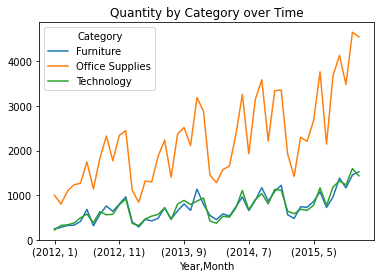

In [97]:
seacat_quant.plot(
    y=seacat_quant.columns,
    title='Quantity by Category over Time'
)

#cyclical pattern, with overall increase per year, with Office Supplies having highest quantity

<AxesSubplot:title={'center':'Sales by Category over Time'}, xlabel='Year,Month'>

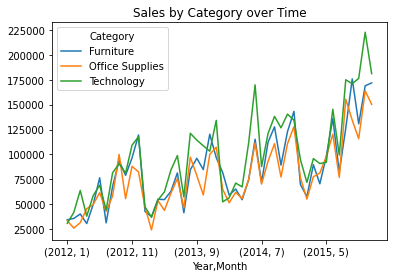

In [103]:
seacat_sales.plot(
    y=seacat_sales.columns,
    title='Sales by Category over Time'
)

#sales closer for the categories

<AxesSubplot:title={'center':'Profit by Category over Time'}, xlabel='Year,Month'>

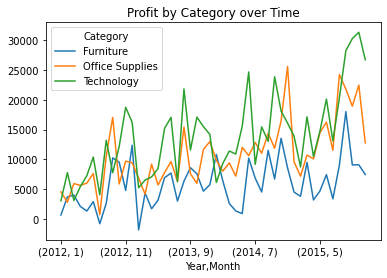

In [104]:
seacat_profit.plot(
    y=seacat_profit.columns,
    title='Profit by Category over Time'
)

#profit highest for Technology and least for Furniture

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [105]:
returns.rename(columns={'Order ID':'Order.ID'},inplace=True)
returns.columns

Index(['Returned', 'Order.ID', 'Region'], dtype='object')

In [106]:
orders = orders.merge(returns, how='left', on='Order.ID')
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.77,High,11,2014,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.63,Critical,2,2014,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.17,9,0.1,919.97,915.49,Medium,10,2014,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.51,5,0.1,-96.54,910.16,Medium,1,2014,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.96,8,0.0,311.52,903.04,Critical,11,2014,NaN,NaN


In [107]:
returned_orders = orders[orders['Returned']=='Yes']
returned_orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Returned,Region_y
26,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1715.16,2,0.0,720.36,725.57,Critical,12,2012,Yes,Eastern Asia
53,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2197.50,5,0.0,153.75,627.27,Critical,12,2012,Yes,Eastern Asia
75,25438,IN-2015-JH158207-42140,2015-05-16,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,2863.35,5,0.1,858.90,581.88,Critical,5,2015,Yes,Oceania
110,32648,CA-2014-AS10045140-41727,2014-03-29,4/1/14,First Class,AS-100451408,Aaron Smayling,Corporate,22204.0,Arlington,...,31.40,2,0.0,7.85,3.81,Medium,3,2014,Yes,Southern US
113,29629,IN-2014-LC168857-41747,2014-04-18,4/19/14,First Class,LC-168857,Lena Creighton,Consumer,NaN,Sydney,...,1601.64,5,0.1,587.19,511.47,Critical,4,2014,Yes,Oceania


In [117]:
returned_loss = returned_orders.groupby(['Year'])[['Profit']].sum()
returned_loss.rename(columns={'Profit':'Profit Loss'},inplace=True)

In [118]:
returned_loss

,Profit Loss
Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


<AxesSubplot:title={'center':'Returns Loss by Year'}, xlabel='Year'>

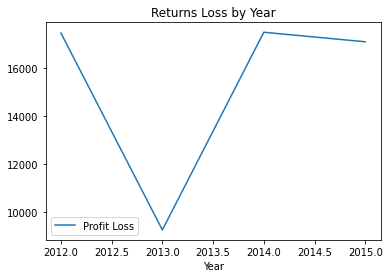

In [119]:
returned_loss.plot(
    y=returned_loss.columns,
    title='Returns Loss by Year'
)

#lowest returns loss in 2013

In [120]:
sum(returned_orders.groupby('Customer.ID')['Returned'].count()>1)

# returned more than once: 547

547

In [122]:
sum(returned_orders.groupby('Customer.ID')['Returned'].count()>5)

# returned more than five times: 46

46

In [148]:
returns_region = returned_orders.groupby('Region_x')['Order.ID'].nunique()
returns_region = returns_region.sort_values(axis=0, ascending=False, inplace=False)
returns_region

Region_x
Western Europe       121
Central America      117
Oceania               78
Western US            72
Eastern US            69
Southeastern Asia     64
South America         61
Southern Asia         58
Southern Europe       55
Eastern Asia          53
Western Asia          50
Central US            44
Southern US           44
Northern Europe       43
Caribbean             31
Western Africa        29
North Africa          26
Eastern Europe        24
Southern Africa       11
Eastern Africa        11
Central Africa        10
Canada                 6
Central Asia           4
Name: Order.ID, dtype: int64

<AxesSubplot:title={'center':'Returns by Region'}, xlabel='Region_x'>

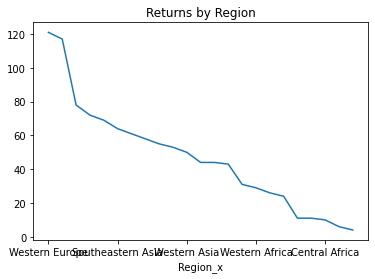

In [149]:
returns_region.plot(
    y=returns_region,
    title='Returns by Region'
)

In [150]:
returns_cat = returned_orders.groupby('Category')['Order.ID'].nunique()
returns_cat = returns_cat.sort_values(axis=0, ascending=False, inplace=False)
returns_cat

Category
Office Supplies    806
Technology         365
Furniture          353
Name: Order.ID, dtype: int64

<AxesSubplot:title={'center':'Returns by Category'}, xlabel='Category'>

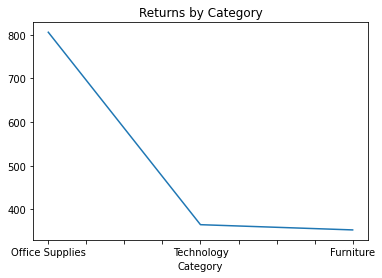

In [151]:
returns_cat.plot(
    y=returns_cat,
    title='Returns by Category'
)

In [147]:
returns_subcat = returned_orders.groupby('Sub.Category')['Order.ID'].nunique()
returns_subcat = returns_subcat.sort_values(axis=0, ascending=False, inplace=False)
returns_subcat

Sub.Category
Binders        239
Art            187
Storage        186
Phones         133
Chairs         132
Paper          132
Accessories    129
Labels         127
Furnishings    124
Bookcases       99
Fasteners       98
Supplies        96
Copiers         94
Envelopes       91
Machines        59
Appliances      59
Tables          38
Name: Order.ID, dtype: int64

<AxesSubplot:title={'center':'Returns by Sub-category'}, xlabel='Sub.Category'>

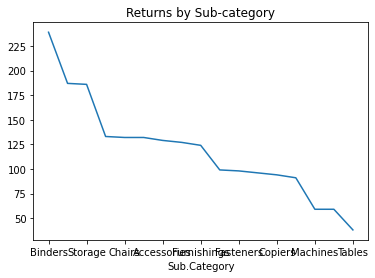

In [146]:
returns_subcat.plot(
    y=returns_subcat,
    title='Returns by Sub-category'
)

## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”


In [137]:
orders['Returned'] = orders['Returned'].map(lambda x: 1 if (x=='Yes') else 0)

#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date

In [139]:
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [140]:
orders['Process.Time'] = orders['Ship.Date'] - orders['Order.Date']

#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID